In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import time
from pandas.io.json import json_normalize

# The plots will be style using the seaborm library.
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Import a new dependency to format the dates
import matplotlib.dates as mdates

In [2]:
# Get data from Alpha Vantage using API request

# Pass the URL and state parameters
url = "https://www.alphavantage.co/query"
params = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": "CL",
        "outputsize": "full",
        "apikey": "ac9ba10aa04a7d"}


# Get Json response
response = requests.get(url, params=params)
data = response.json()

# Define the data columns we want passed
def df_alpha_response(data,
         columns=['Open', 'High', 'Low', 'Close', 'AdjClose', 'Volume']):

    def results_alpha_response(d):
        # convert the response into datetimerecords that can be parsed by Pandas
        for dt, prec in d['Time Series (Daily)'].items():
            r = { 'date': dt}
            r.update(prec)
            yield r
               
    oil_df = pd.DataFrame(results_alpha_response(data))
    # rename the columns    
    oil_df = oil_df.rename(columns={'1. open': 'Open',
                            '2. high': 'High',
                            '3. low': 'Low',
                            '4. close': 'Close',
                            '5. adjusted close': 'AdjClose',
                            '6. volume': 'Volume'})
    oil_df['date'] = pd.to_datetime(oil_df['date'])
    oil_df.set_index('date', inplace=True)
    oil_df.sort_index(inplace=True)
    # extract the default columns
    oil_df = oil_df[columns]
    return oil_df


# Reset index
oil_df = df_alpha_response(data)
oil_df.reset_index(level=0, inplace=True)
oil_df.head()

,date,Open,High,Low,Close,AdjClose,Volume
0,1998-01-02,74.5000,74.5000,72.6900,73.2500,11.9706,451500
1,1998-01-05,74.0000,74.8800,73.2500,74.8800,12.2369,770000
2,1998-01-06,74.9400,74.9400,71.7500,71.9400,11.7565,861600
3,1998-01-07,70.2500,71.6300,69.8800,71.6300,11.7058,1125100
4,1998-01-08,71.6300,71.7500,69.3800,69.7500,11.3986,949700


In [3]:
# Select the date range we want to plot (this one will be for the year 2001)
oil_df1 = oil_df[(oil_df['date'] > '2000-07-01') & (oil_df['date'] < '2000-09-30')]
oil_df2 = oil_df[(oil_df['date'] > '2001-07-01') & (oil_df['date'] < '2001-09-30')]
oil_comb = [oil_df1, oil_df2]
oil_full = pd.concat(oil_comb)
oil_full.head()

,date,Open,High,Low,Close,AdjClose,Volume
630,2000-07-03,59.6300,60.0000,58.6300,59.8800,20.1801,864500
631,2000-07-05,59.0000,59.8100,58.8800,59.3100,19.9880,1610600
632,2000-07-06,59.8800,60.2500,58.7500,58.8100,19.8195,1355900
633,2000-07-07,57.5000,57.9400,56.8800,57.1900,19.2735,2124900
634,2000-07-10,57.2500,57.8800,55.5000,55.6900,18.7680,1475400


In [4]:
# Convert date to datetime64
oil_full['date'] = pd.to_datetime(oil_full['date'])
oil_full.dtypes

date        datetime64[ns]
Open                object
High                object
Low                 object
Close               object
AdjClose            object
Volume              object
dtype: object

In [5]:
# Set the date an index
oil_full = oil_full.set_index('date')
oil_full.head()

,Open,High,Low,Close,AdjClose,Volume
date,,,,,,
2000-07-03,59.6300,60.0000,58.6300,59.8800,20.1801,864500
2000-07-05,59.0000,59.8100,58.8800,59.3100,19.9880,1610600
2000-07-06,59.8800,60.2500,58.7500,58.8100,19.8195,1355900
2000-07-07,57.5000,57.9400,56.8800,57.1900,19.2735,2124900
2000-07-10,57.2500,57.8800,55.5000,55.6900,18.7680,1475400


In [6]:
# Add columns with year, month, and weekday name to the dataframe
oil_full['Year'] = oil_full.index.year
oil_full['Month'] = oil_full.index.month
oil_full['Weekday Name'] = oil_full.index.weekday_name

# Display a random sampling of 5 rows
# oil_full.sample(5, random_state=0)

In [7]:
#For the the column values to be used in the plots, we MUST convert them into numeric values first.
# the date was converted in datatime after creating the dataframe
oil_full.Open=pd.to_numeric(oil_full.Open)
oil_full.High=pd.to_numeric(oil_full.High)
oil_full.Low=pd.to_numeric(oil_full.Low)
oil_full.Close=pd.to_numeric(oil_full.Close)
oil_full.AdjClose=pd.to_numeric(oil_full.AdjClose)
oil_full.Volume=pd.to_numeric(oil_full.Volume)
oil_full.Year=pd.to_numeric(oil_full.Year)
oil_full.Month=pd.to_numeric(oil_full.Month)

In [8]:
oil_full3 = pd.DataFrame(oil_full)
oil_full3.head()

,Open,High,Low,Close,AdjClose,Volume,Year,Month,Weekday Name
date,,,,,,,,,
2000-07-03,59.63,60.00,58.63,59.88,20.1801,864500,2000,7,Monday
2000-07-05,59.00,59.81,58.88,59.31,19.9880,1610600,2000,7,Wednesday
2000-07-06,59.88,60.25,58.75,58.81,19.8195,1355900,2000,7,Thursday
2000-07-07,57.50,57.94,56.88,57.19,19.2735,2124900,2000,7,Friday
2000-07-10,57.25,57.88,55.50,55.69,18.7680,1475400,2000,7,Monday


In [9]:
oil_Close = pd.pivot_table(oil_full3, index = ['Year','Month'], values= ["Close", "Volume"])
oil_Close

Close        Volume
Year Month                         
2000 7      55.907500  2.099960e+06
     8      53.336087  1.407857e+06
     9      48.816000  3.961010e+06
2001 7      56.105714  2.018305e+06
     8      54.412609  1.424848e+06
     9      56.191333  2.425960e+06

In [10]:
oil_Close = pd.pivot_table(oil_full3, index = oil_full3.index.month, columns = oil_full3.index.year, values= "Close")
oil_Close

date,2000,2001
date,,
7,55.907500,56.105714
8,53.336087,54.412609
9,48.816000,56.191333


## Bar Plot - Crude Oil Stocks Comparison 07/00 - 09/00 & 07/01 - 09/01 

<Figure size 432x288 with 0 Axes>

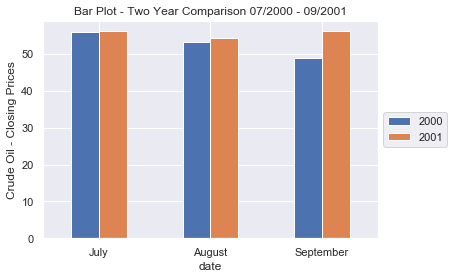

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()  

fig = plt.figure()
pd.pivot_table(oil_full3, 
               index = oil_full3.index.month, 
               columns = oil_full3.index.year, values= "Close",
               aggfunc='mean').plot(kind= 'bar')
plt.gca().set_xticklabels(['July', 'August', 'September'])
plt.ylabel("Crude Oil - Closing Prices")
plt.title('Bar Plot - Two Year Comparison 07/2000 - 09/2001')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("bar1.png", dpi=150)
plt.xticks(rotation=0)
plt.show()

The bar plot illustrates very little difference between July and August, however, in September there is a big decrease in the year 2000